In [1]:
# Εγκατάσταση των βιβλιοθηκών numpy (για αριθμητικούς υπολογισμούς), pandas (για επεξεργασία δεδομένων),
# matplotlib και seaborn (για οπτικοποίηση δεδομένων), scikit-learn (για machine learning) και torch (για deep learning)
# Οι βιβλιοθήκες είναι ήδη εγκατεστημένες στο περιβάλλον και δεν χρειάζεται να τις ξαναεγκαταστήσουμε.
# Αν κάποιος τρέξει το notebook σε νέο περιβάλλον, θα χρειαστεί να εκτελέσει την εξής εντολή για να εγκαταστήσει τις βιβλιοθήκες:
# !pip install numpy pandas matplotlib seaborn scikit-learn torch

In [1]:
# Εισαγωγή των απαραίτητων βιβλιοθηκών

import numpy as np # Για αριθμητικούς υπολογισμούς και διαχείριση πινάκων (arrays)
from sklearn.preprocessing import StandardScaler, label_binarize # Για την κανονικοποίηση των χαρακτηριστικών (features) στο σύνολο δεδομένων
from sklearn.linear_model import LogisticRegression # Για το μοντέλο λογιστικής παλινδρόμησης (Logistic Regression)
# για την αξιολόγηση του μοντέλου:
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, roc_curve, auc
) 
from sklearn.decomposition import PCA # Για την ανάλυση κύριων συνιστωσών (Principal Component Analysis)
from sklearn.model_selection import GridSearchCV # Υποστήριξη για εύρεση των βέλτιστων υπερπαραμέτρων μέσω αναζήτησης σε grid
import matplotlib.pyplot as plt # Για τη δημιουργία γραφημάτων και οπτικοποίηση των αποτελεσμάτων
import seaborn as sns # Για γραφήματα και αναλυτικές οπτικοποιήσεις
from matplotlib.colors import ListedColormap # Για τη δημιουργία προσαρμοσμένων χρωματικών χαρτών
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Για ανάλυση διακριτικής συνιστώσας (Linear Discriminant Analysis)
from mpl_toolkits.mplot3d import Axes3D # Για τρισδιάστατη οπτικοποίηση γραφημάτων

In [2]:
# Φορτώνουμε τα δεδομένα από το αρχείο που αποθηκεύσαμε

data = np.load('train_test_images_normalized_images.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
class_names = data['class_names']  # Φόρτωση των ονομάτων των κατηγοριών

# Εκτύπωση των σχημάτων και των ονομάτων των κατηγοριών
print(f"Φορτώθηκε το Σχήμα Συνόλου Εκπαίδευσης: {X_train.shape}, ετικέτες: {y_train.shape}")
print(f"Φορτώθηκε το Σχήμα Συνόλου Δοκιμής: {X_test.shape}, ετικέτες: {y_test.shape}")
print(f"Ονόματα Κατηγοριών: {class_names}")

Φορτώθηκε το Σχήμα Συνόλου Εκπαίδευσης: (2800, 4096), ετικέτες: (2800,)
Φορτώθηκε το Σχήμα Συνόλου Δοκιμής: (1200, 4096), ετικέτες: (1200,)
Ονόματα Κατηγοριών: ['BreastMRI' 'ChestCT' 'CXR' 'Hand']


In [3]:
# Εκπαίδευση δεδομένων χωρίς μείωση διαστάσεων LDA

# Flatten τα δεδομένα για το Training και Test Set
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_flattened)  # Εκπαίδευση και μετασχηματισμός του training set
X_test_std = scaler.transform(X_test_flattened)  # Μόνο μετασχηματισμός του test set

# Εκπαίδευση Logistic Regression πάνω στα δεδομένα του Training Set
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_std, y_train)  # Εκπαίδευση με τα δεδομένα του Training Set

# Προβλέψεις για το Test Set
y_pred = clf.predict(X_test_std)

# Εκτύπωση Test Accuracy
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Εκτύπωση Classification Report για το Test Set
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Test Accuracy: 0.9925

Logistic Regression Classification Report:
               precision    recall  f1-score   support

   BreastMRI       1.00      1.00      1.00       300
     ChestCT       0.99      0.99      0.99       300
         CXR       0.99      1.00      1.00       300
        Hand       0.99      0.98      0.99       300

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



In [4]:
# LDA (Linear Discriminant Analysis) 

# Flatten images for LDA
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_flattened)
X_test_std = scaler.transform(X_test_flattened)

# Number of LDA components (at most n_classes - 1)
n_classes = len(np.unique(y_train))
n_components = n_classes - 1

# Fit LDA on training data
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

print("LDA reduced train shape:", X_train_lda.shape)
print("LDA reduced test shape:", X_test_lda.shape)

LDA reduced train shape: (2800, 3)
LDA reduced test shape: (1200, 3)


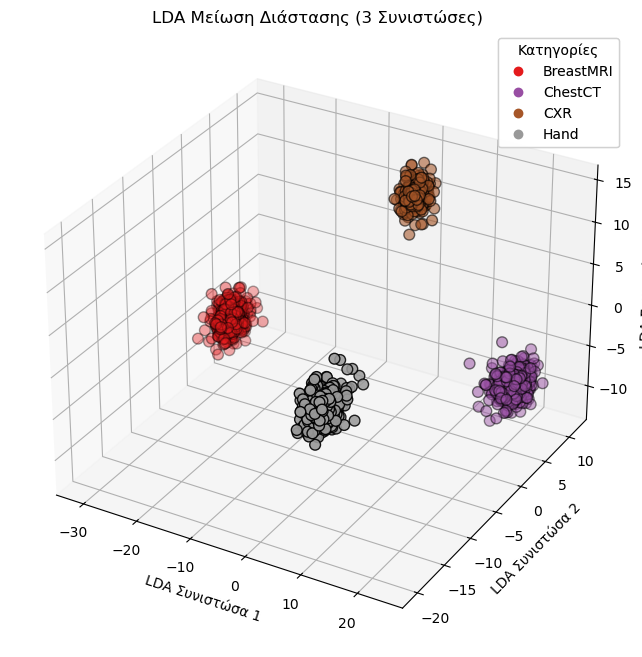

In [5]:
# Δημιουργία 3D scatter plot για τα δεδομένα μετά την LDA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Σχεδίαση των σημείων εκπαίδευσης
scatter = ax.scatter(X_train_lda[:, 0], X_train_lda[:, 1], X_train_lda[:, 2], 
                     c=y_train, cmap='Set1', s=60, edgecolor='k')

# Ρυθμίσεις γραφήματος
ax.set_xlabel('LDA Συνιστώσα 1')
ax.set_ylabel('LDA Συνιστώσα 2')
ax.set_zlabel('LDA Συνιστώσα 3')
ax.set_title('LDA Μείωση Διάστασης (3 Συνιστώσες)')

# Αντιστοίχιση των αριθμητικών labels στις κατηγορίες
# Εδώ βάζουμε τις κατηγορίες από την `class_names` (π.χ. 'BreastMRI', 'ChestCT', κλπ)
class_labels = ['BreastMRI', 'ChestCT', 'CXR', 'Hand']

# Δημιουργία του υπομνήματος (legend) με τις ονομαστικές κατηγορίες
legend1 = ax.legend(handles=scatter.legend_elements()[0], 
                    labels=class_labels, 
                    title="Κατηγορίες")
ax.add_artist(legend1)

plt.show()

In [6]:
# Logistic regreression με LDA

# Train multiclass logistic regression classifier
clf = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
clf.fit(X_train_lda, y_train)

# Predict on test set
y_pred = clf.predict(X_test_lda)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Test Accuracy: 0.9716666666666667

Classification Report:
               precision    recall  f1-score   support

   BreastMRI       0.98      1.00      0.99       300
     ChestCT       0.99      0.95      0.97       300
         CXR       0.95      0.99      0.97       300
        Hand       0.97      0.95      0.96       300

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



Confusion  Matrix:
 [[300   0   0   0]
 [  1 285   8   6]
 [  0   2 296   2]
 [  4   2   9 285]]


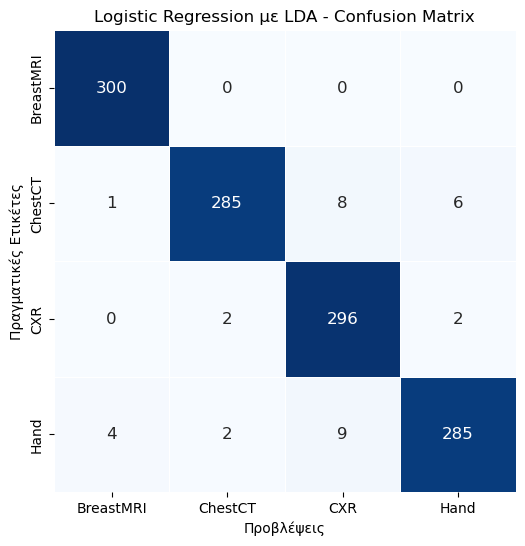

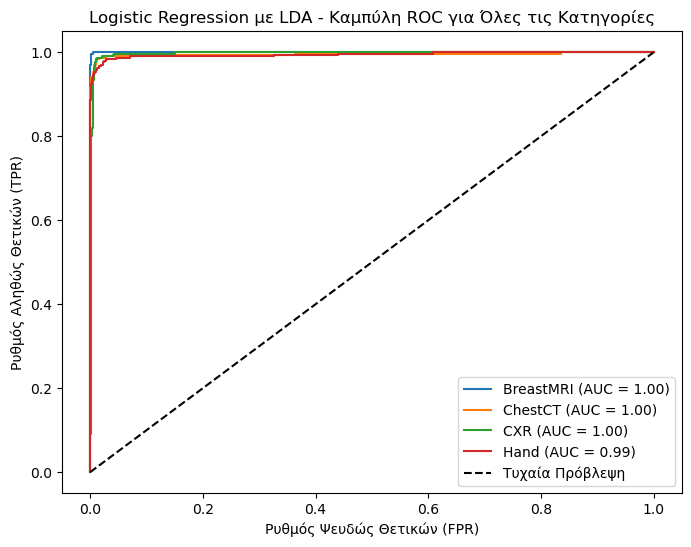

In [7]:
def plot_confusion_matrix(cm, class_labels, title="Confusion Matrix"):
    """
    Εμφανίζει τον Confusion Matrix χωρίς τις διαχωριστικές γραμμές.
    
    Παράμετροι:
        cm: Confusion Matrix
        class_labels: Λίστα ετικετών κατηγοριών
        title: Τίτλος του γραφήματος
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels,
                cbar=False, square=True, annot_kws={"size": 12}, linewidths=0.5, linecolor='white')  # Το 'linewidths=0.5' αφαιρεί τις γραμμές
    plt.xlabel('Προβλέψεις')
    plt.ylabel('Πραγματικές Ετικέτες')
    plt.title(title)
    plt.show()

def evaluate_model_performance(clf, X_test, y_test, class_labels=None, title_prefix=""):
    """
    Εκτελεί αξιολόγηση και οπτικοποίηση της απόδοσης ενός εκπαιδευμένου μοντέλου.
    
    Παράμετροι:
        clf: Εκπαιδευμένος ταξινομητής
        X_test: Δεδομένα του test set (χαρακτηριστικά)
        y_test: Πραγματικές ετικέτες του test set
        class_labels: Λίστα ετικετών κατηγοριών (προαιρετικό)
        title_prefix: Πρόθεμα τίτλου για τα γραφήματα (προαιρετικό)
    """
    # Δημιουργία προβλέψεων με το μοντέλο
    y_pred = clf.predict(X_test)
    if class_labels is None:
        class_labels = np.unique(y_test)

    # Υπολογισμός και εμφάνιση του (Confusion Matrix)
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)
    print("Confusion  Matrix:\n", cm)
    plot_confusion_matrix(cm, class_names, title=f"{title_prefix} - Confusion Matrix")

    # Υπολογισμός και εμφάνιση καμπύλης ROC 
    y_score = None
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
    elif hasattr(clf, "decision_function"):
        y_score = clf.decision_function(X_test)

    if y_score is not None:
        # Μετατροπή σε δυαδική μορφή για κάθε κατηγορία 
        y_test_bin = label_binarize(y_test, classes=class_labels)
        plt.figure(figsize=(8, 6))
        for i, class_label in enumerate(class_labels):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])  # Υπολογισμός των FPR και TPR
            roc_auc = auc(fpr, tpr)  # Υπολογισμός του AUC
            plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Τυχαία Πρόβλεψη')  # Προσθήκη της γραμμής της τυχαίας πρόβλεψης
        plt.xlabel('Ρυθμός Ψευδώς Θετικών (FPR)')
        plt.ylabel('Ρυθμός Αληθώς Θετικών (TPR)')
        plt.title(f'{title_prefix} - Καμπύλη ROC για Όλες τις Κατηγορίες')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("Η καμπύλη ROC και το AUC δεν είναι διαθέσιμα για αυτόν τον ταξινομητή.")

# Αξιολόγηση της απόδοσης του ταξινομητή Logistic Regression με LDA
evaluate_model_performance(clf, X_test_lda, y_test, class_labels=np.unique(y_train), title_prefix="Logistic Regression με LDA")

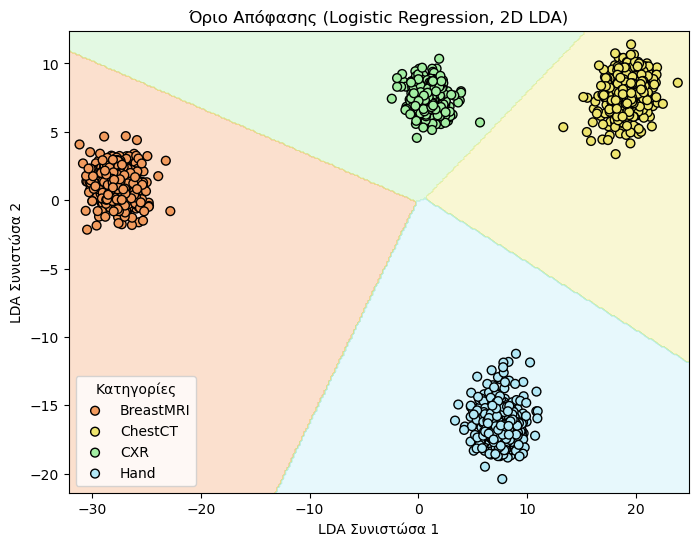

In [8]:
# Ονόματα των κατηγοριών (π.χ., για το BreastMRI, ChestCT κ.λπ.)
class_names = ['BreastMRI', 'ChestCT', 'CXR', 'Hand']

# Δημιουργία του χρωματικού χάρτη
colors = ["#F29B5E", "#EEE56F", "#A3EEA3", "#B2E8F6"]
custom_cmap = ListedColormap(colors)

# Μειώνουμε τις διαστάσεις των δεδομένων σε 2D για να τα οπτικοποιήσουμε (LDA)
X_train_2d = X_train_lda[:, :2]  # Επιλέγουμε τις πρώτες δύο συνιστώσες για τα δεδομένα εκπαίδευσης από το LDA
X_test_2d = X_test_lda[:, :2]  # Επιλέγουμε τις πρώτες δύο συνιστώσες για τα δεδομένα δοκιμής από το LDA

# Εκπαιδεύουμε ξανά τον ταξινομητή Logistic Regression με τα δεδομένα σε 2D για να απεικονίσουμε το όριο απόφασης
clf_2d = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
clf_2d.fit(X_train_2d, y_train)

# Δημιουργούμε ένα πλέγμα για να σχεδιάσουμε το όριο απόφασης
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1  # Ορίζουμε το εύρος για τον άξονα x
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1  # Ορίζουμε το εύρος για τον άξονα y
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))  # Δημιουργούμε το πλέγμα

# Προβλέπουμε τις κατηγορίες για κάθε σημείο του πλέγματος
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Αντιστοιχίζουμε τις ετικέτες των κατηγοριών σε ακέραιες τιμές για να κάνουμε το contourf
class_labels, Z_int = np.unique(y_train, return_inverse=True)  # Εξάγουμε τις μοναδικές κατηγορίες από το training set
label_to_int = {label: idx for idx, label in enumerate(class_labels)}  # Δημιουργούμε ένα λεξικό για να αντιστοιχίσουμε τις ετικέτες σε ακέραιες τιμές
Z_int = np.array([label_to_int[label] for label in Z])  # Μετατρέπουμε τις προβλέψεις σε ακέραιες τιμές
Z_int = Z_int.reshape(xx.shape)  # Αναδιαμορφώνουμε το Z για να έχει το ίδιο σχήμα με το πλέγμα

# Δημιουργούμε το διάγραμμα με την οπτικοποίηση του ορίου απόφασης
plt.figure(figsize=(8, 6))

# Σχεδιάζουμε το όριο απόφασης με τις προβλέψεις του ταξινομητή και απενεργοποιούμε τις γραμμές
plt.contourf(xx, yy, Z_int, alpha=0.3, cmap=custom_cmap)  # Σχεδιάζουμε το όριο απόφασης με τις προβλέψεις του ταξινομητή
plt.contour(xx, yy, Z_int, colors='none')  # Αφαιρούμε τις γραμμές των ορίων

# Σχεδίαση των σημείων εκπαίδευσης με τα ονόματα των κατηγοριών στο υπομνημα
handles = []  # Για να κρατήσουμε τα handles των κατηγοριών για το υπομνημα

for i, class_label in enumerate(class_names):  # Χρησιμοποιούμε τα ονόματα των κατηγοριών εδώ
    idx = np.where(y_train == i)
    scatter = plt.scatter(X_train_2d[idx, 0], X_train_2d[idx, 1],
                label=f'{class_label}',  # Εδώ εμφανίζονται τα ονόματα
                edgecolor='k', s=40,
                c=[custom_cmap(i)] * len(idx[0]))

    # Προσθήκη των σημείων στο handle για το υπομνημα
    handles.append(scatter)


# Προσθήκη τίτλων και ετικετών στους άξονες
plt.xlabel('LDA Συνιστώσα 1')  # Ετικέτα για τον πρώτο άξονα (Συνιστώσα LDA 1)
plt.ylabel('LDA Συνιστώσα 2')  # Ετικέτα για τον δεύτερο άξονα (Συνιστώσα LDA 2)
plt.title('Όριο Απόφασης (Logistic Regression, 2D LDA)')  # Τίτλος του γραφήματος

# Απενεργοποιούμε το πλέγμα για να μην υπάρχουν γραμμές
plt.grid(False)

# Προσθήκη του υπομνήματος με τα ονόματα των κατηγοριών
plt.legend(handles=handles, title="Κατηγορίες", loc='best')

# Εμφάνιση του γραφήματος
plt.show()


In [9]:
# Grid search για τις καλύτερες υπερπαραμέτρους με Logistic Regression και LDA features

# Ορίζουμε το parameter grid
param_grid = {
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100,1000,2500, 5000]
}

# Initialize Logistic Regression 
logreg = LogisticRegression()

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=2
)

# Fit on PCA-reduced training data
grid_search.fit(X_train_lda, y_train)

# Best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test_lda)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Fitting 3 folds for each of 160 candidates, totalling 480 fits
Best parameters found: {'C': np.float64(0.0001), 'max_iter': 100, 'solver': 'lbfgs'}
Best cross-validation score: 1.0
Test Accuracy: 0.975

Logistic Regression Classification Report:
               precision    recall  f1-score   support

   BreastMRI       0.98      1.00      0.99       300
     ChestCT       0.99      0.96      0.98       300
         CXR       0.95      0.99      0.97       300
        Hand       0.98      0.95      0.96       300

    accuracy                           0.97      1200
   macro avg       0.98      0.97      0.97      1200
weighted avg       0.98      0.97      0.97      1200



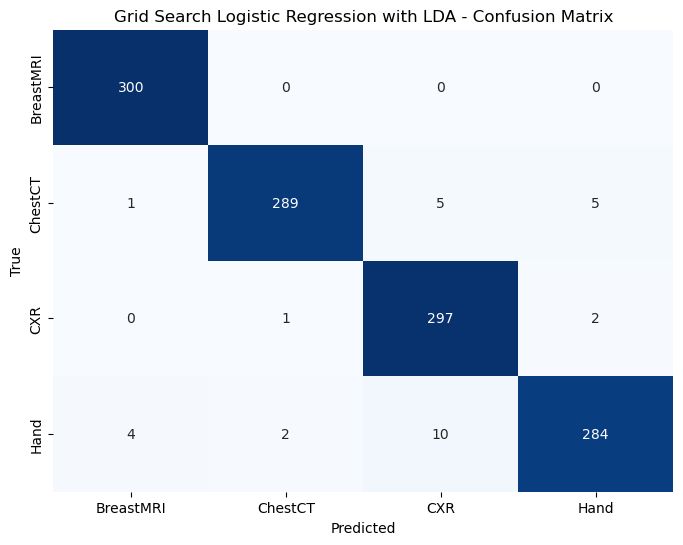

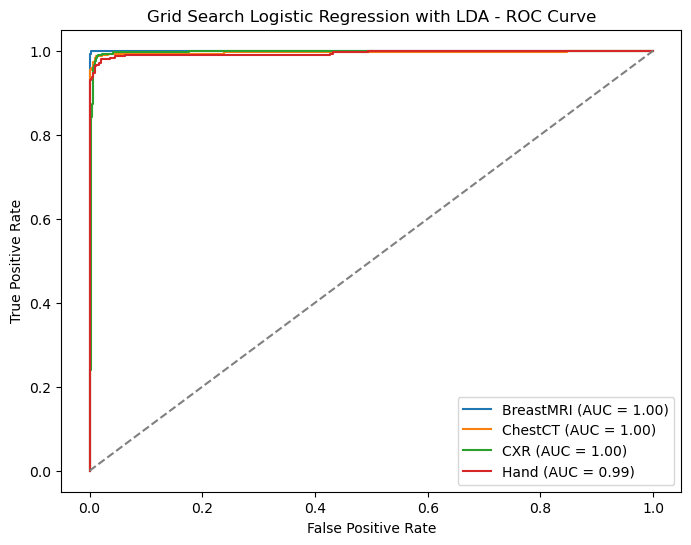

In [10]:
def assess_model_performance(model, X_test, y_test, class_names, title_prefix=""):
    """
    Εκτελεί αξιολόγηση του μοντέλου και εμφανίζει τον Confusion Matrix και την ROC Curve.
    
    Παράμετροι:
        model: Το εκπαιδευμένο μοντέλο
        X_test: Δεδομένα του test set
        y_test: Πραγματικές ετικέτες του test set
        class_names: Λίστα με τα ονόματα των κατηγοριών
        title_prefix: Πρόθεμα τίτλου για τα γραφήματα (προαιρετικό)
    """
    # 1. Εμφάνιση του Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Οπτικοποίηση του Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False)
    plt.title(f'{title_prefix} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # 2. Εμφάνιση του ROC Curve για κάθε κατηγορία (αν multi-class)
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    y_pred_prob = model.predict_proba(X_test)

    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')  # Χρησιμοποιούμε τα ονόματα των κατηγοριών

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'{title_prefix} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Εφαρμογή της συνάρτησης στο μοντέλο που έχουμε εκπαιδεύσει
assess_model_performance(grid_search.best_estimator_, X_test_lda, y_test, class_names=['BreastMRI', 'ChestCT', 'CXR', 'Hand'], title_prefix="Grid Search Logistic Regression with LDA")